<a href="https://colab.research.google.com/github/TarunChaubey/A/blob/master/Birth_Rate_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
f_birth = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv',index_col=[0],parse_dates=[0])
print(f_birth.shape)

(365, 1)


In [ ]:
f_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<Figure size 720x864 with 0 Axes>

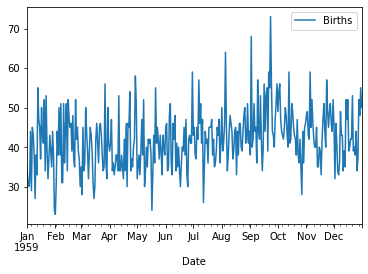

In [ ]:
plt.figure(figsize=(10,12))
f_birth.plot()
plt.show()

**Normalization**

In [ ]:
# normalization_formula = (x-min)/(max-min)

In [ ]:
f_birth.mean()

Births    41.980822
dtype: float64

In [ ]:
f_birth.max()

Births    73
dtype: int64

In [ ]:
f_birth.min()

Births    23
dtype: int64

In [ ]:
(35-23)/(73-23)

0.24

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
birth_arr = f_birth.values # To change into array
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.fit(birth_arr)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.data_max_

array([73.])

In [ ]:
scaler.data_min_

array([23.])

In [ ]:
birth_norm = scaler.fit_transform(birth_arr)
birth_norm

array([[0.24],
       [0.18],
       [0.14],
       [0.16],
       [0.42],
       [0.12],
       [0.44],
       [0.4 ],
       [0.3 ],
       [0.08],
       [0.3 ],
       [0.2 ],
       [0.64],
       [0.48],
       [0.44],
       [0.28],
       [0.54],
       [0.4 ],
       [0.36],
       [0.58],
       [0.22],
       [0.6 ],
       [0.32],
       [0.18],
       [0.28],
       [0.4 ],
       [0.32],
       [0.24],
       [0.42],
       [0.3 ],
       [0.02],
       [0.  ],
       [0.16],
       [0.42],
       [0.3 ],
       [0.54],
       [0.3 ],
       [0.56],
       [0.16],
       [0.16],
       [0.56],
       [0.26],
       [0.44],
       [0.56],
       [0.22],
       [0.58],
       [0.48],
       [0.44],
       [0.46],
       [0.32],
       [0.5 ],
       [0.28],
       [0.24],
       [0.58],
       [0.38],
       [0.44],
       [0.32],
       [0.28],
       [0.14],
       [0.24],
       [0.1 ],
       [0.44],
       [0.22],
       [0.26],
       [0.54],
       [0.42],
       [0.

In [ ]:
for i in range(5):
  print(birth_norm[i])

[0.24]
[0.18]
[0.14]
[0.16]
[0.42]


In [ ]:
birth_train = birth_norm[:330]
birth_test = birth_norm[330:]
print("Train {} \nTest {}".format(birth_train.shape,birth_test.shape))

Train (330, 1) 
Test (35, 1)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
birth_model = ARIMA(birth_train, order = (2,1,2))

In [ ]:
birth_model_fit = birth_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [ ]:
birth_model_fit.aic

-344.25985425789884

In [ ]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]

In [ ]:
birth_forecast

array([0.46611016, 0.4622752 , 0.46167904, 0.46140412, 0.46125185,
       0.46119457, 0.46121748, 0.46130854, 0.46145756, 0.46165585,
       0.46189604, 0.46217186, 0.46247797, 0.46280985, 0.46316363,
       0.46353604, 0.46392429, 0.46432601, 0.46473918, 0.46516208,
       0.46559327, 0.4660315 , 0.46647571, 0.46692502, 0.46737866,
       0.46783597, 0.46829642, 0.46875953, 0.4692249 , 0.4696922 ,
       0.47016113, 0.47063145, 0.47110296, 0.47157548, 0.47204885])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(birth_test,birth_forecast)).round(5)

0.14472

In [ ]:
birth_forecast_reshape = birth_forecast.reshape(len(birth_forecast),1)

In [ ]:
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)
birth_forecast_reverse

array([[46.30550801],
       [46.11375997],
       [46.08395188],
       [46.07020585],
       [46.06259254],
       [46.05972848],
       [46.060874  ],
       [46.06542718],
       [46.07287786],
       [46.08279235],
       [46.09480187],
       [46.10859284],
       [46.12389862],
       [46.14049247],
       [46.15818161],
       [46.17680209],
       [46.19621451],
       [46.21630033],
       [46.23695877],
       [46.25810411],
       [46.27966348],
       [46.30157491],
       [46.32378569],
       [46.34625104],
       [46.36893283],
       [46.39179868],
       [46.41482103],
       [46.43797647],
       [46.46124507],
       [46.48460989],
       [46.50805653],
       [46.53157275],
       [46.55514813],
       [46.57877381],
       [46.60244227]])

In [ ]:
birth_test_reshape = birth_test.reshape(len(birth_test),1)

In [ ]:
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [ ]:
np.sqrt(mean_squared_error(birth_test_reverse,birth_forecast_reverse)).round(5)

7.23589

In [ ]:
# Standerdization
# formula  = x-min/std

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(birth_arr)

In [ ]:
std_scaler.mean_

array([41.98082192])

In [ ]:
std_scaler.var_

array([53.84894727])